In [47]:
!pip install scikit-learn pandas numpy shap fairlearn xgboost

In [48]:
!pip install --upgrade scikit-learn xgboost

In [49]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-02-14 18:00:30--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv.1’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.08s   

2025-02-14 18:00:31 (31.8 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv.1’ saved [2546489/2546489]



In [50]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 4.9M
-rw-r--r-- 1 root root 2.5M Feb 14 17:59 compas-scores-two-years.csv
-rw-r--r-- 1 root root 2.5M Feb 14 18:00 compas-scores-two-years.csv.1


In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [52]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [53]:
df.shape

(7214, 53)

In [54]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

### **Identifiers & Personal Information:**
1. **'id'** – Unique identifier for each individual in the dataset.  
2. **'name'** – Full name of the individual.  
3. **'first'** – First name of the individual.  
4. **'last'** – Last name of the individual.  
5. **'dob'** – Date of birth.  
6. **'sex'** – Gender of the individual (Male/Female).  
7. **'race'** – Ethnicity of the individual (e.g., African-American, Caucasian, etc.).  

In [55]:
columns_to_drop = ['id','name','first','last','dob','sex','race']

### **Demographic & Age Information:**
8. **'age'** – Age of the individual at the time of assessment.  
9. **'age_cat'** – Categorized age groups (e.g., 18-25, 26-45, 46+).  

### **Criminal History & Prior Records:**
10. **'juv_fel_count'** – Number of juvenile felony convictions.  
11. **'juv_misd_count'** – Number of juvenile misdemeanor convictions.  
12. **'juv_other_count'** – Number of other juvenile offenses.  
13. **'priors_count'** – Total number of prior adult convictions.  

In [56]:
columns_to_drop += ['juv_other_count']

### **Current Case Information:**
14. **'compas_screening_date'** – Date when the COMPAS risk assessment was conducted.  
15. **'c_case_number'** – Unique identifier for the individual's criminal case.  
16. **'c_offense_date'** – Date of the current offense.  
17. **'c_arrest_date'** – Date of the arrest for the current charge.  
18. **'c_charge_degree'** – Severity of the current charge (M = Misdemeanor, F = Felony).  
19. **'c_charge_desc'** – Description of the current charge (e.g., 'Grand Theft', 'Drug Possession').  
20. **'c_days_from_compas'** – Number of days between COMPAS assessment and the current case.  

In [57]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date']

### **Jail Custody Information:**
21. **'c_jail_in'** – Date the individual was jailed for the current offense.  
22. **'c_jail_out'** – Date the individual was released from jail for the current offense.

In [58]:
columns_to_drop += ['c_jail_in','c_jail_out']

### **Recidivism (Reoffense) Information:**
23. **'is_recid'** – 1 if the individual reoffended, 0 otherwise.  
24. **'two_year_recid'** – 1 if the individual reoffended within two years, 0 otherwise.  


### **Reoffense Case Details:**
25. **'r_case_number'** – Case number for the recidivism offense.  
26. **'r_offense_date'** – Date of the reoffense.  
27. **'r_arrest_date'** – Date of arrest for the reoffense.  
28. **'r_days_from_arrest'** – Days between the original offense and the reoffense.  
29. **'r_charge_degree'** – Severity of the reoffense (M = Misdemeanor, F = Felony).  
30. **'r_charge_desc'** – Description of the reoffense charge.  
31. **'r_jail_in'** – Jail entry date for the reoffense.  
32. **'r_jail_out'** – Jail exit date for the reoffense.  

In [59]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_days_from_arrest', 'r_jail_in', 'r_jail_out']

### **Violent Recidivism Information:**
33. **'violent_recid'** – Number of times the individual has committed a violent reoffense.  
34. **'is_violent_recid'** – 1 if the individual committed a violent reoffense, 0 otherwise.  
35. **'vr_case_number'** – Case number for violent recidivism.  
36. **'vr_offense_date'** – Date of the violent reoffense.  
37. **'vr_charge_degree'** – Severity of the violent reoffense (M = Misdemeanor, F = Felony).  
38. **'vr_charge_desc'** – Description of the violent reoffense charge.  

In [60]:
columns_to_drop += ['vr_case_number', 'vr_offense_date']

### **COMPAS Risk Assessment Scores:**
39. **'type_of_assessment'** – Type of risk assessment (e.g., General Recidivism, Violent Recidivism).  
40. **'decile_score'** – Risk score (1-10) predicting likelihood of recidivism.  
41. **'score_text'** – Categorical risk level based on 'decile_score' (Low, Medium, High).  
42. **'decile_score.1'** – Duplicate of 'decile_score'.  

In [61]:
columns_to_drop += ['type_of_assessment','decile_score.1']

### **Violent Recidivism Risk Scores:**
43. **'v_type_of_assessment'** – Type of assessment for violent recidivism.  
44. **'v_decile_score'** – Risk score (1-10) predicting violent reoffense.  
45. **'v_score_text'** – Categorical risk level for violent recidivism (Low, Medium, High).  
46. **'v_screening_date'** – Date of the violent recidivism assessment.  

In [62]:
columns_to_drop += ['v_type_of_assessment','v_screening_date']

### **Additional Features & Redundant Columns:**
47. **'days_b_screening_arrest'** – Days between arrest and COMPAS screening.  
48. **'priors_count.1'** – Duplicate of 'priors_count'.  
49. **'in_custody'** – Date when the person entered custody.  
50. **'out_custody'** – Date when the person left custody.  
51. **'start'** – Beginning of a time-based event (not clearly defined).  
52. **'end'** – End of a time-based event (not clearly defined).  
53. **'event'** – An unspecified event indicator.  


In [63]:
columns_to_drop += ['days_b_screening_arrest','priors_count.1','in_custody','out_custody','start','end','event']

In [64]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'sex',
 'race',
 'juv_other_count',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_days_from_arrest',
 'r_jail_in',
 'r_jail_out',
 'vr_case_number',
 'vr_offense_date',
 'type_of_assessment',
 'decile_score.1',
 'v_type_of_assessment',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [65]:
df = df.drop(columns=columns_to_drop,axis=1)

In [66]:
df.head()

,age,age_cat,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,violent_recid,is_violent_recid,vr_charge_degree,vr_charge_desc,score_text,screening_date,v_decile_score,v_score_text,two_year_recid
0,69,Greater than 45,0,1,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,0,NaN,NaN,Low,2013-08-14,1,Low,0
1,34,25 - 45,0,3,0,0,F,Felony Battery w/Prior Convict,1,(F3),Felony Battery (Dom Strang),NaN,1,(F3),Felony Battery (Dom Strang),Low,2013-01-27,1,Low,1
2,24,Less than 25,0,4,0,4,F,Possession of Cocaine,1,(M1),Driving Under The Influence,NaN,0,NaN,NaN,Low,2013-04-14,3,Low,1
3,23,Less than 25,0,8,1,1,F,Possession of Cannabis,0,NaN,NaN,NaN,0,NaN,NaN,High,2013-01-13,6,Medium,0
4,43,25 - 45,0,1,0,2,F,arrest case no charge,0,NaN,NaN,NaN,0,NaN,NaN,Low,2013-03-26,1,Low,0


In [67]:
df.shape

(7214, 20)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7214 non-null   int64  
 1   age_cat           7214 non-null   object 
 2   juv_fel_count     7214 non-null   int64  
 3   decile_score      7214 non-null   int64  
 4   juv_misd_count    7214 non-null   int64  
 5   priors_count      7214 non-null   int64  
 6   c_charge_degree   7214 non-null   object 
 7   c_charge_desc     7185 non-null   object 
 8   is_recid          7214 non-null   int64  
 9   r_charge_degree   3471 non-null   object 
 10  r_charge_desc     3413 non-null   object 
 11  violent_recid     0 non-null      float64
 12  is_violent_recid  7214 non-null   int64  
 13  vr_charge_degree  819 non-null    object 
 14  vr_charge_desc    819 non-null    object 
 15  score_text        7214 non-null   object 
 16  screening_date    7214 non-null   object 


In [69]:
print(df.isnull().sum())

age                    0
age_cat                0
juv_fel_count          0
decile_score           0
juv_misd_count         0
priors_count           0
c_charge_degree        0
c_charge_desc         29
is_recid               0
r_charge_degree     3743
r_charge_desc       3801
violent_recid       7214
is_violent_recid       0
vr_charge_degree    6395
vr_charge_desc      6395
score_text             0
screening_date         0
v_decile_score         0
v_score_text           0
two_year_recid         0
dtype: int64


In [70]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values for column '{col}':")
        print(df[col].value_counts())
        print("-" * 20)

Unique values for column 'age_cat':
age_cat
25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_degree':
c_charge_degree
F    4666
M    2548
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_desc':
c_charge_desc
Battery                           1156
arrest case no charge             1137
Possession of Cocaine              474
Grand Theft in the 3rd Degree      425
Driving While License Revoked      200
                                  ... 
Solicit Purchase Cocaine             1
Compulsory Sch Attnd Violation       1
Battery On Fire Fighter              1
Oper Motorcycle W/O Valid DL         1
Possession of XLR11                  1
Name: count, Length: 437, dtype: int64
--------------------
Unique values for column 'r_charge_degree':
r_charge_degree
(M1)     1201
(M2)     1107
(F3)      892
(F2)      168
(F1)       51
(MO3)      39
(F7)        7
(F6)   

In [71]:
columns = ['r_charge_degree', 'r_charge_desc', 'vr_charge_degree', 'vr_charge_desc','violent_recid']
df = df.drop(columns=columns,axis=1)
df.head()

,age,age_cat,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,score_text,screening_date,v_decile_score,v_score_text,two_year_recid
0,69,Greater than 45,0,1,0,0,F,Aggravated Assault w/Firearm,0,0,Low,2013-08-14,1,Low,0
1,34,25 - 45,0,3,0,0,F,Felony Battery w/Prior Convict,1,1,Low,2013-01-27,1,Low,1
2,24,Less than 25,0,4,0,4,F,Possession of Cocaine,1,0,Low,2013-04-14,3,Low,1
3,23,Less than 25,0,8,1,1,F,Possession of Cannabis,0,0,High,2013-01-13,6,Medium,0
4,43,25 - 45,0,1,0,2,F,arrest case no charge,0,0,Low,2013-03-26,1,Low,0


In [72]:
df['c_charge_desc'].dropna()

,c_charge_desc
0,Aggravated Assault w/Firearm
1,Felony Battery w/Prior Convict
2,Possession of Cocaine
3,Possession of Cannabis
4,arrest case no charge
...,...
7209,Deliver Cannabis
7210,Leaving the Scene of Accident
7211,Aggravated Battery / Pregnant
7212,Battery on Law Enforc Officer


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               7214 non-null   int64 
 1   age_cat           7214 non-null   object
 2   juv_fel_count     7214 non-null   int64 
 3   decile_score      7214 non-null   int64 
 4   juv_misd_count    7214 non-null   int64 
 5   priors_count      7214 non-null   int64 
 6   c_charge_degree   7214 non-null   object
 7   c_charge_desc     7185 non-null   object
 8   is_recid          7214 non-null   int64 
 9   is_violent_recid  7214 non-null   int64 
 10  score_text        7214 non-null   object
 11  screening_date    7214 non-null   object
 12  v_decile_score    7214 non-null   int64 
 13  v_score_text      7214 non-null   object
 14  two_year_recid    7214 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 845.5+ KB


In [74]:
df.drop(columns=['c_charge_desc'], inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               7214 non-null   int64 
 1   age_cat           7214 non-null   object
 2   juv_fel_count     7214 non-null   int64 
 3   decile_score      7214 non-null   int64 
 4   juv_misd_count    7214 non-null   int64 
 5   priors_count      7214 non-null   int64 
 6   c_charge_degree   7214 non-null   object
 7   is_recid          7214 non-null   int64 
 8   is_violent_recid  7214 non-null   int64 
 9   score_text        7214 non-null   object
 10  screening_date    7214 non-null   object
 11  v_decile_score    7214 non-null   int64 
 12  v_score_text      7214 non-null   object
 13  two_year_recid    7214 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 789.2+ KB


In [76]:
df.drop(columns=['screening_date'], inplace=True)

In [77]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values for column '{col}':")
        print(df[col].value_counts())
        print("-" * 20)

Unique values for column 'age_cat':
age_cat
25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_degree':
c_charge_degree
F    4666
M    2548
Name: count, dtype: int64
--------------------
Unique values for column 'score_text':
score_text
Low       3897
Medium    1914
High      1403
Name: count, dtype: int64
--------------------
Unique values for column 'v_score_text':
v_score_text
Low       4761
Medium    1739
High       714
Name: count, dtype: int64
--------------------


In [78]:
one_hot_encode = ['age_cat','score_text','v_score_text']
df = pd.get_dummies(df, columns=one_hot_encode, drop_first=True, dtype=int)

In [79]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,v_decile_score,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium
0,69,0,1,0,0,F,0,0,1,0,1,0,1,0,1,0
1,34,0,3,0,0,F,1,1,1,1,0,0,1,0,1,0
2,24,0,4,0,4,F,1,0,3,1,0,1,1,0,1,0
3,23,0,8,1,1,F,0,0,6,0,0,1,0,0,0,1
4,43,0,1,0,2,F,0,0,1,0,0,0,1,0,1,0


In [80]:
df['c_charge_degree'].unique()

array(['F', 'M'], dtype=object)

In [81]:
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})

In [82]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,v_decile_score,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium
0,69,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
1,34,0,3,0,0,1,1,1,1,1,0,0,1,0,1,0
2,24,0,4,0,4,1,1,0,3,1,0,1,1,0,1,0
3,23,0,8,1,1,1,0,0,6,0,0,1,0,0,0,1
4,43,0,1,0,2,1,0,0,1,0,0,0,1,0,1,0


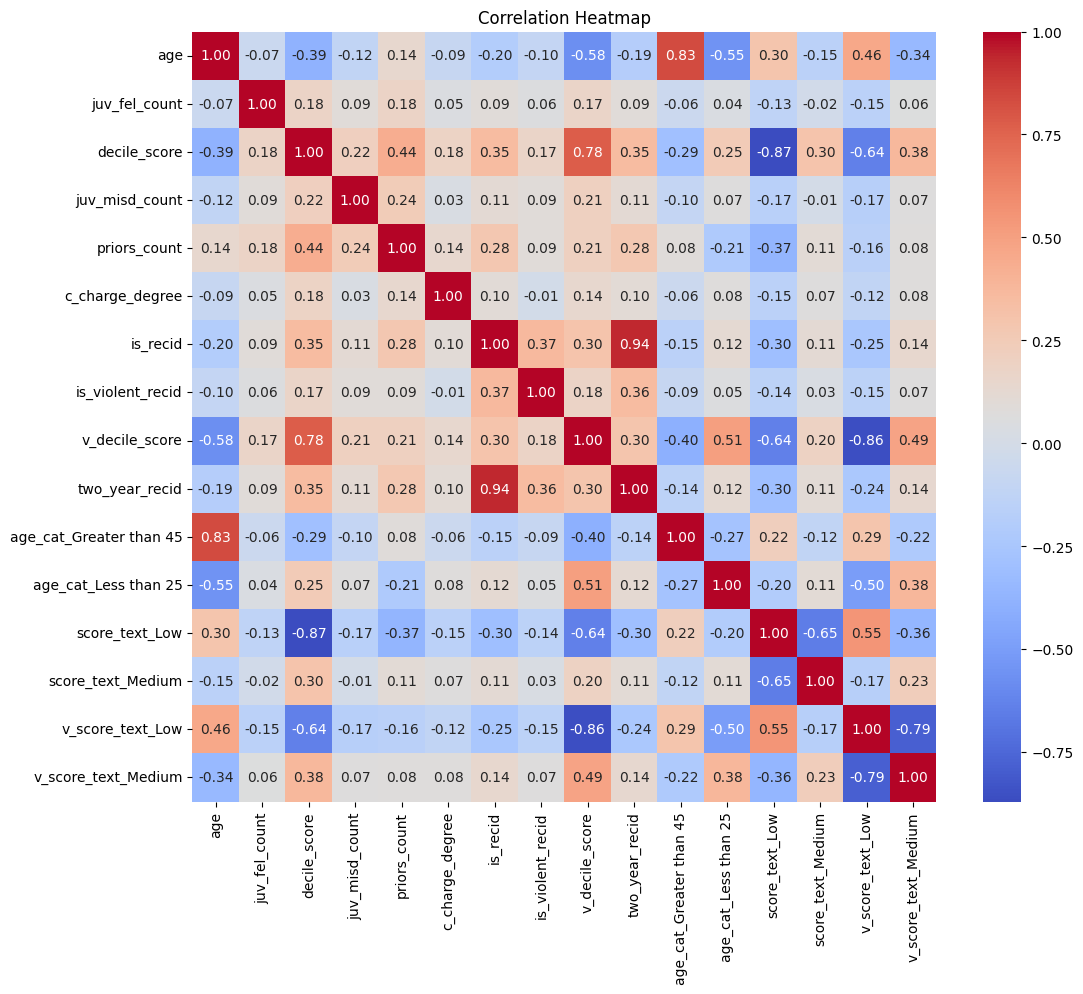

In [83]:
# prompt: create a correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
X = df.drop(columns=['two_year_recid'],axis=1)
y = df['two_year_recid']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [88]:
y_pred = model_1.predict(X_test)

Accuracy: 0.9722799722799723
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       823
           1       0.95      0.99      0.97       620

    accuracy                           0.97      1443
   macro avg       0.97      0.97      0.97      1443
weighted avg       0.97      0.97      0.97      1443

Confusion Matrix:
 [[789  34]
 [  6 614]]


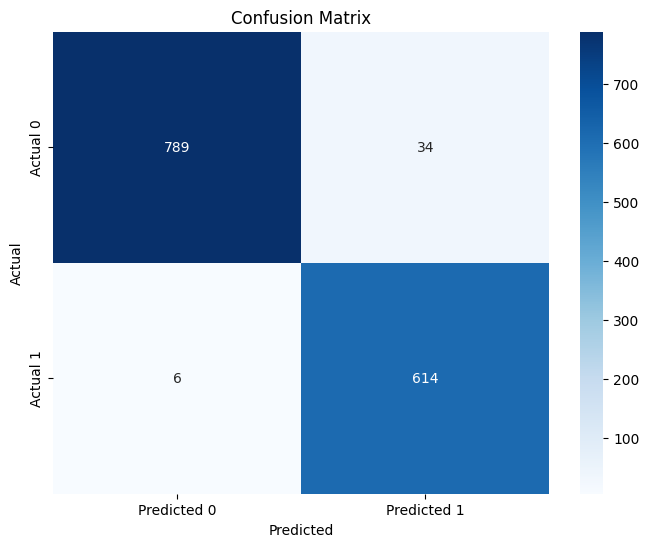

In [89]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [90]:
from sklearn.svm import SVC
model_2 = SVC(random_state=42)
model_2.fit(X_train, y_train)

SVC(random_state=42)

In [91]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.9736659736659736
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       823
           1       0.95      1.00      0.97       620

    accuracy                           0.97      1443
   macro avg       0.97      0.98      0.97      1443
weighted avg       0.97      0.97      0.97      1443

Confusion Matrix:
 [[788  35]
 [  3 617]]


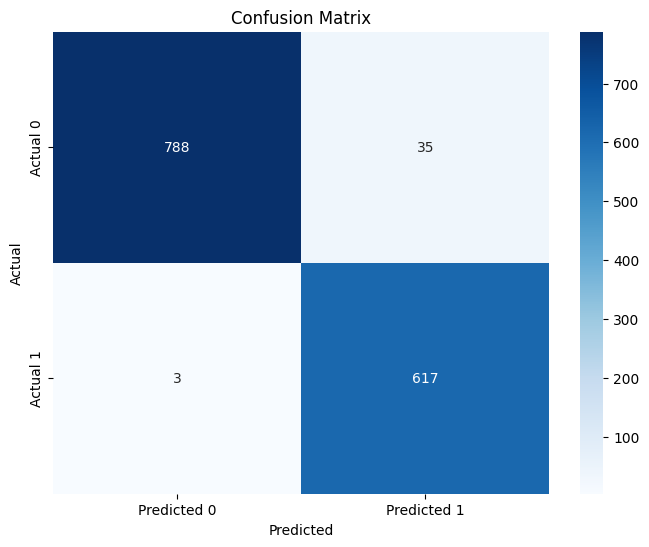

In [93]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()